In [8]:
import cv2
import easyocr
import numpy as np

reader = easyocr.Reader(
    ['en'],
    gpu=False,
    recog_network='best_norm_ED',
    detect_network="dbnet18",
    user_network_directory='../models',
    model_storage_directory='../models',
) # this needs to run only once to load the model into memory


# Read image as numpy array
image = cv2.imread('../examples/kz_book_simple.jpeg')

# Rotate the image by 270 degrees
# image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Convert the image from BGR to RGB (because OpenCV loads images in BGR format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Using CPU. Note: This module is much faster with a GPU.


In [9]:
results = reader.readtext(image = image)

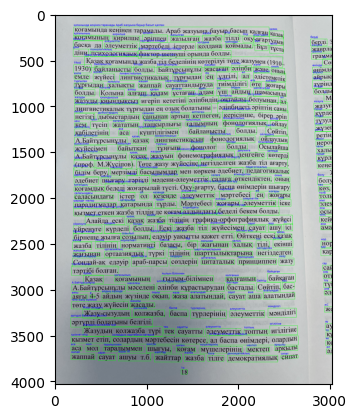

In [10]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# Load custom font
font_path = "./Ubuntu-Regular.ttf"
font = ImageFont.truetype(font_path, 32)

# Display the results
for (bbox, text, prob) in results:
    # Get the bounding box coordinates
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = (int(top_left[0]), int(top_left[1]))
    bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

    # Draw the bounding box on the image
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

    # Convert the OpenCV image to a PIL image, draw the text, then convert back to an OpenCV image
    image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(image_pil)
    draw.text((top_left[0], top_left[1] - 40), text, font=font, fill=(0, 0, 255))
    image = cv2.cvtColor(np.array(image_pil), cv2.COLOR_RGB2BGR)

# Save image
cv2.imwrite('./model_output.jpg', image)

# Show the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# results


In [11]:
results

[([[203, 141], [2328, 141], [2328, 240], [203, 240]],
  'қоғамында кеңінен тарамады Араб жазуына бауыр басып қалған',
  0.7791520106411797),
 ([[205, 231], [589, 231], [589, 288], [205, 288]],
  'қоғамының',
  0.9500048986845336),
 ([[627, 240], [921, 240], [921, 296], [627, 296]],
  'кирилше',
  0.6288625266000087),
 ([[953, 225], [1221, 225], [1221, 310], [953, 310]],
  'әрішен',
  0.6425964822618738),
 ([[1254, 248], [1573, 248], [1573, 300], [1254, 300]],
  'жазылған',
  0.6488410499302744),
 ([[1605, 230], [1809, 230], [1809, 305], [1605, 305]],
  'жазба',
  0.7196523255198581),
 ([[1839, 220], [2010, 220], [2010, 301], [1839, 301]],
  'тілді',
  0.9955059518723279),
 ([[2043, 239], [2166, 239], [2166, 307], [2043, 307]],
  'Оқу',
  0.8776296380431655),
 ([[198, 293], [517, 293], [517, 382], [198, 382]],
  'басқа да',
  0.6806190938434352),
 ([[538, 316], [893, 316], [893, 378], [538, 378]],
  'әлеуметтік',
  0.999511501888752),
 ([[920, 311], [1525, 311], [1525, 397], [920, 397]]

In [5]:
reader.readtext(image = image, paragraph=True)

[[[[160, 93], [2656, 93], [2656, 3940], [160, 3940]],
  "қоғамында кеңінен тарамады Араб жазуына бауыр басып қалған қазақ 'оғамының қоғамында кеміпен тарамады Арабажазуынаббауыр басық .аупан жазылған қазақ 6арағамьа Да ъләуметтк мөрғзереер е қолаарышен жазылған жазба қоймлады оқу алартұутаың ;баскямда фадеууеу ккболмәртебелі істерде қолдана қоймады Б тұста ддінқаққоихаалан иявдеяқ кёра қитаор арм өҚнаушті орында болды 19зо) байқазаждоламьнда жазба тіл беделінің көжлеріль төте жазумен және (оыо 193О)жбайланысты болды Байтұрадан нүлы жасаан әлішби әдқелаа емле линвистикалық ең ал оның емле жүйесі пинг Вхасамикалықуат анұрдаыдан ең түлдтіліз ал өте әдісжемелік тұрғыдан халықты ёзұрғыдақлыналықты жапшайст са уаттандьгруда 'иімиімігі Өшаеасы үш ;қоғары алғаш жолды Қолына алғаш қалатіні члсойас салайлызрдиалин ал үш айдың шамасында жазуды қиындықсыз игеріп 2қазуалы тұрыеңоыр ъбсыз игеріп кететіні әліпбидіңәлятауйлн болуынан ап наптдыбвмсти калық тұрғыаз ең озық болатынрншеэліпбидегі әрілтің 